<a href="https://colab.research.google.com/github/Himanshu-1703/DL_concepts/blob/main/Cat_Dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshuarora17","key":"a0ff11803f5e2f6b34c2901cbe6fcf45"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:30<00:00, 41.7MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.9MB/s]


In [ ]:
! unzip '/content/dogs-vs-cats.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory as image_gen
from keras.layers import Dropout
from keras.layers import Rescaling,RandomCrop,RandomFlip,RandomRotation

In [ ]:
# image generators

train_data = image_gen(
    directory='/content/train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256,256)
)

validation_data = image_gen(
    directory='/content/test',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
from keras.layers import Flatten

In [ ]:
# Build CNN

model = Sequential()

# scale the input
model.add(Rescaling(scale=1/255))

# data augmentation layers
model.add(RandomFlip())
model.add(RandomRotation(factor=0.2))

# add conv_layers
model.add(Conv2D(filters=64,kernel_size=(3,3),
                 padding='valid',activation='relu',
                 input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),
                 padding='valid',activation='relu',
                 ))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),
                 padding='valid',activation='relu',
                 ))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),
                 padding='valid',activation='relu',
                 ))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=(2,2)))


model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# model summary

model.build(input_shape=(32,256,256,3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (32, 256, 256, 3)         0         
                                                                 
 random_flip_2 (RandomFlip)  (32, 256, 256, 3)         0         
                                                                 
 random_rotation_2 (RandomRo  (32, 256, 256, 3)        0         
 tation)                                                         
                                                                 
 conv2d_9 (Conv2D)           (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (32, 127, 127, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (32, 125, 125, 128)      

In [ ]:
history = model.fit(train_data,validation_data=validation_data,epochs=40)

Epoch 1/40
625/625 [==============================] - 88s 135ms/step - loss: 0.6925 - accuracy: 0.5214 - val_loss: 0.6920 - val_accuracy: 0.5442
Epoch 2/40
625/625 [==============================] - 85s 136ms/step - loss: 0.6854 - accuracy: 0.5527 - val_loss: 0.6809 - val_accuracy: 0.5624
Epoch 3/40
625/625 [==============================] - 84s 134ms/step - loss: 0.6766 - accuracy: 0.5828 - val_loss: 0.6699 - val_accuracy: 0.5950
Epoch 4/40
625/625 [==============================] - 85s 134ms/step - loss: 0.6519 - accuracy: 0.6241 - val_loss: 0.6178 - val_accuracy: 0.6612
Epoch 5/40
625/625 [==============================] - 85s 136ms/step - loss: 0.6198 - accuracy: 0.6638 - val_loss: 0.6120 - val_accuracy: 0.6750
Epoch 6/40
625/625 [==============================] - 86s 137ms/step - loss: 0.6045 - accuracy: 0.6798 - val_loss: 0.5834 - val_accuracy: 0.7042
Epoch 7/40
625/625 [==============================] - 85s 135ms/step - loss: 0.5861 - accuracy: 0.6952 - val_loss: 0.5550 - val_ac

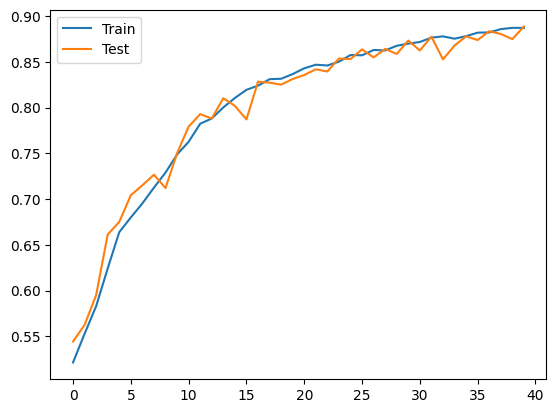

In [ ]:
# plot the accuracy plots

plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.legend()
plt.show()

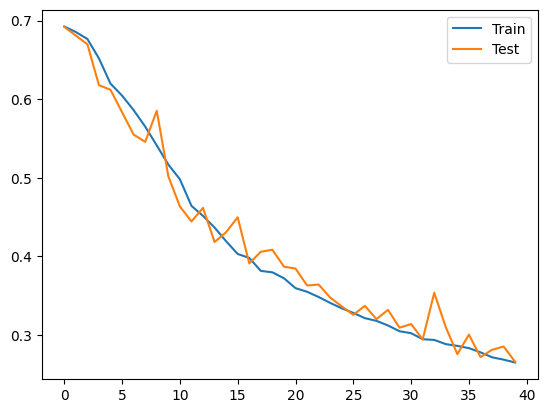

In [ ]:
# plot the loss plots

plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.legend()
plt.show()